CHALLENGE 1
* Create a public repo named "week2_spatial" with its README file. (1 point)
* Clone the repo to your computer. (1 point)
* In the local repo in your computer, create a folder named "data". (1 point)
* Get Three maps for the same country: the lines can be rivers, highways or similar; the points have to be airports; and the polygons of the 2rd administrative division ('provinces' in Perú, 'counties' in USA). Download those maps into the "data" folder. You can find airports here: https://ourairports.com/data/ (5 points)
* Plot in one map the three layers of maps, including the code. (5 points)
* Publish the three layer map. (3 points)
* Update the README to offer a quick explanation, the data dictionary, and the link to the published map. (2 points)
* Make sure the code is well organized (explanations, comments, no warnings, no python messages). (2 points)

In [25]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("data","World_Countries","World_Countries.shp"))

In [26]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [27]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

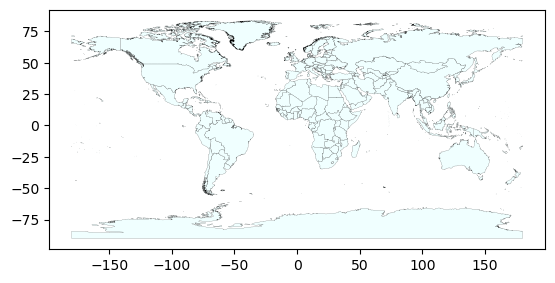

In [28]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [29]:
rivers=gpd.read_file(os.path.join("data","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("data","World_Cities","World_Cities.shp"))

<Axes: >

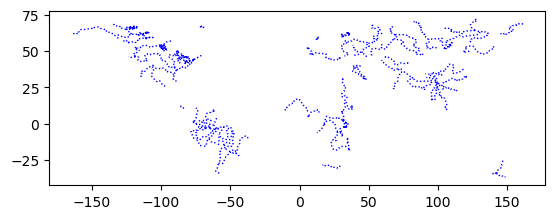

In [30]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

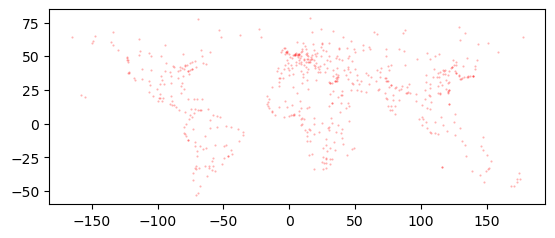

In [31]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

In [32]:
countries.crs==cities.crs==cities.crs

True

<Axes: >

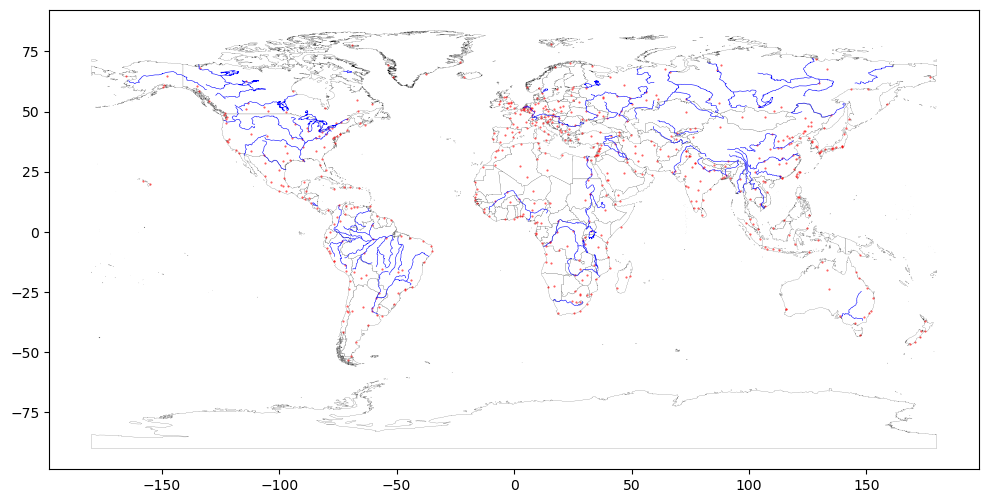

In [33]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [34]:
countries.to_file(os.path.join("data","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("data","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("data","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

In [35]:
rusia=countries[countries.COUNTRY=='Russia']

In [36]:
citiesRusia_clipped = gpd.clip(gdf=cities,
                          mask=rusia)
riversRusia_clipped = gpd.clip(gdf=rivers,
                               mask=rusia)

<Axes: >

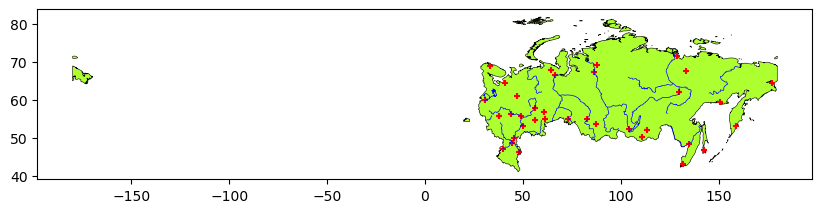

In [37]:
base = rusia.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(10,10))
citiesRusia_clipped.plot(marker='+', color='red', markersize=15,
                     ax=base)
riversRusia_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)


In [24]:
rusia.geom_type

188    MultiPolygon
dtype: object

In [38]:
citiesRusia_clipped.geom_type


580    Point
589    Point
364    Point
521    Point
457    Point
3      Point
361    Point
415    Point
360    Point
358    Point
359    Point
27     Point
452    Point
11     Point
436    Point
450    Point
474    Point
65     Point
55     Point
363    Point
22     Point
12     Point
10     Point
9      Point
8      Point
352    Point
6      Point
5      Point
4      Point
440    Point
1      Point
464    Point
478    Point
545    Point
2      Point
0      Point
dtype: object

In [39]:
riversRusia_clipped.geom_type

18         LineString
86    MultiLineString
17         LineString
88         LineString
3     MultiLineString
28         LineString
82         LineString
4     MultiLineString
51    MultiLineString
0          LineString
94    MultiLineString
30         LineString
46    MultiLineString
78    MultiLineString
58         LineString
33    MultiLineString
87         LineString
31         LineString
dtype: object

In [40]:
# check units
rusia.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [41]:
# centroid
rusia.centroid

C:\Users\Monica Gonzales\AppData\Local\Temp\ipykernel_19604\3148883377.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rusia.centroid


188    POINT (96.69193 61.98838)
dtype: geometry

In [44]:
rusia.to_crs(3576).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [46]:
rusia.to_crs(3576).centroid

188    POINT (310355.986 18267149.645)
dtype: geometry

<Axes: >

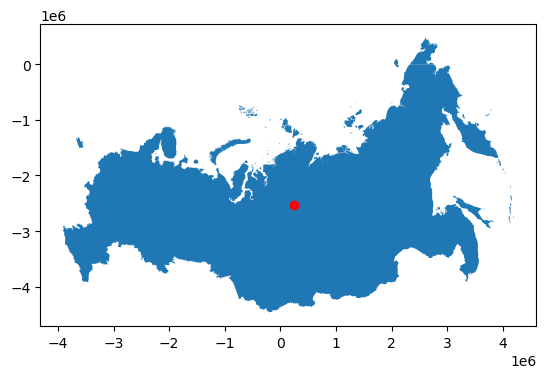

In [67]:
base5641 = rusia.to_crs(3576).plot()
rusia.to_crs(3576).centroid.plot(color='red', ax=base5641)

In [69]:
rusia_5641 = rusia.to_crs(3576)

cities_rusia_5641 = citiesRusia_clipped.to_crs(rusia_5641.crs)

rivers_rusia_5641 = riversRusia_clipped.to_crs(rusia_5641.crs)

In [129]:
import os

rusia_5641.to_file(os.path.join("data", "rusiaMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_rusia_5641.to_file(os.path.join("data", "rusiacities_5641.gpkg"), layer='cities', driver="GPKG")
rivers_rusia_5641.to_file(os.path.join("data", "rusiarivers_5641.gpkg"), layer='rivers', driver="GPKG")
rusia_5641.centroid
rusia_5641.centroid.to_file(os.path.join("data", "rusiacentroid_5641.gpkg"), layer='centroid', driver="GPKG")

In [130]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","ru-airports.csv"))


infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,26396,UUEE,large_airport,Sheremetyevo International Airport,55.972599,37.414600,622.0,EU,Russia,RU,...,Moscow,1,UUEE,SVO,NaN,http://svo.aero/en/,https://en.wikipedia.org/wiki/Sheremetyevo_Int...,"MOW, Международный аэропорт Шереметьево, svo, ...",1012675,2024-05-24T17:49:49+00:00
1,26394,UUDD,large_airport,Domodedovo International Airport,55.408798,37.906300,588.0,EU,Russia,RU,...,Moscow,1,UUDD,DME,NaN,http://www.domodedovo.ru/en/,https://en.wikipedia.org/wiki/Domodedovo_Inter...,"MOW, Аэропорт Домоде́дово",51200,2024-05-24T17:50:28+00:00
2,6489,ULLI,large_airport,Pulkovo Airport,59.800301,30.262501,78.0,EU,Russia,RU,...,St. Petersburg,1,ULLI,LED,NaN,https://pulkovoairport.ru/,https://en.wikipedia.org/wiki/Pulkovo_Airport,"Аэропо́рт Пу́лково, Leningrad, Shosseynaya Air...",1200,2024-05-24T16:44:09+00:00
3,26401,UUWW,large_airport,Vnukovo International Airport,55.591499,37.261501,685.0,EU,Russia,RU,...,Moscow,1,UUWW,VKO,NaN,https://vnukovo.ru/en/,https://en.wikipedia.org/wiki/Vnukovo_Internat...,"MOW, Международный аэропорт Внуково",1000,2024-05-24T17:37:41+00:00
1679,352996,RU-0859,heliport,Zorgol Heliport,50.587200,119.257230,1650.0,EU,Russia,RU,...,Zorgol,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-02-24T18:56:07+00:00
1680,44702,RU-0193,heliport,Pushkino Heliport,56.042000,37.978001,NaN,EU,Russia,RU,...,Zverosovkhoz,0,NaN,NaN,NaN,http://www.agusta.ru/,NaN,Вертодром Пушкино,0,2010-02-25T11:06:38+00:00
1681,533241,RU-1034,heliport,Odoptu BKP & North Drillsite Heliport,53.153282,143.260839,35.0,AS,Russia,RU,...,Охá,0,NaN,NaN,NaN,NaN,NaN,"Oil & Gas, Exxon Neftegas, HELIOPS, Odoptu BKP...",0,2024-06-14T10:37:47+00:00
1682,533244,RU-1035,heliport,Odoptu South Drillsite Heliport,53.059084,143.270817,NaN,EU,Russia,RU,...,Охá,0,NaN,NaN,NaN,NaN,NaN,"Oil & Gas, Exxon Neftegas, HELIOPS, Odoptu Sou...",0,2024-06-13T17:44:13+00:00


In [131]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,26394,UUDD,large_airport,Domodedovo International Airport,55.408798,37.906300,588.0,EU,Russia,RU,...,Moscow,1,UUDD,DME,NaN,http://www.domodedovo.ru/en/,https://en.wikipedia.org/wiki/Domodedovo_Inter...,"MOW, Аэропорт Домоде́дово",51200,2024-05-24T17:50:28+00:00
1,6489,ULLI,large_airport,Pulkovo Airport,59.800301,30.262501,78.0,EU,Russia,RU,...,St. Petersburg,1,ULLI,LED,NaN,https://pulkovoairport.ru/,https://en.wikipedia.org/wiki/Pulkovo_Airport,"Аэропо́рт Пу́лково, Leningrad, Shosseynaya Air...",1200,2024-05-24T16:44:09+00:00
2,26401,UUWW,large_airport,Vnukovo International Airport,55.591499,37.261501,685.0,EU,Russia,RU,...,Moscow,1,UUWW,VKO,NaN,https://vnukovo.ru/en/,https://en.wikipedia.org/wiki/Vnukovo_Internat...,"MOW, Международный аэропорт Внуково",1000,2024-05-24T17:37:41+00:00
3,6519,URSS,large_airport,Sochi International Airport,43.449902,39.956600,89.0,EU,Russia,RU,...,Sochi,1,URSS,AER,NaN,https://aer.aero/en,https://en.wikipedia.org/wiki/Sochi_Internatio...,"Adler Airport, Black Sea, Международный Аэропо...",1200,2024-07-10T11:26:39+00:00
4,6507,UNNT,large_airport,Novosibirsk Tolmachevo Airport,55.019756,82.618675,365.0,EU,Russia,RU,...,Novosibirsk,1,UNNT,OVB,NaN,http://eng.tolmachevo.ru/,https://en.wikipedia.org/wiki/Tolmachevo_Airport,NaN,1000,2021-10-12T13:23:52+00:00


In [132]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [133]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1682 non-null   object 
 1   type           1682 non-null   object 
 2   latitude_deg   1682 non-null   float64
 3   longitude_deg  1682 non-null   float64
 4   elevation_ft   1065 non-null   float64
 5   region_name    1682 non-null   object 
 6   municipality   1566 non-null   object 
dtypes: float64(3), object(4)
memory usage: 92.1+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

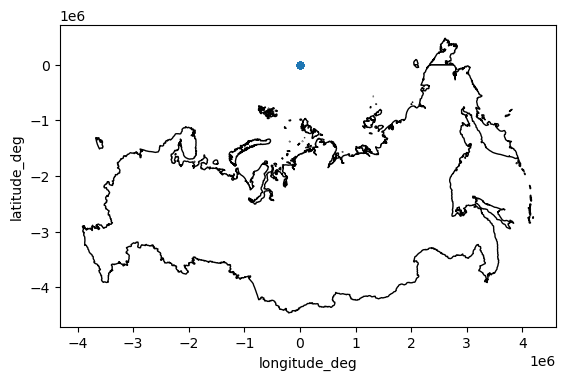

In [134]:
base = rusia_5641.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [135]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=rusia.crs.to_epsg())

<Axes: >

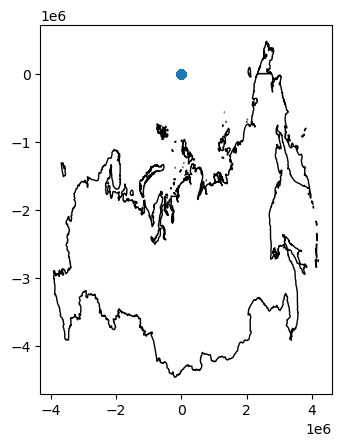

In [136]:
base = rusia_5641.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [137]:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

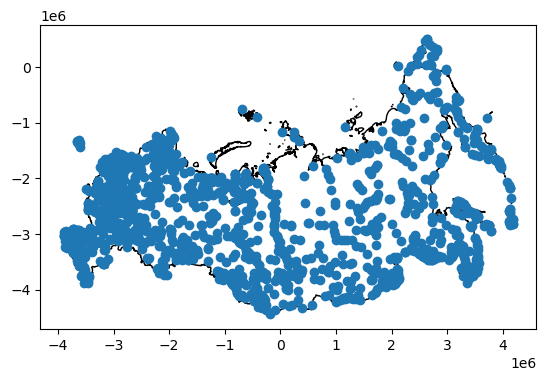

In [138]:
airports_5641=airports.to_crs(3576)

base = rusia_5641.plot(color='white', edgecolor='black')
airports_5641.plot(ax=base)


In [139]:
airports_5641['type'].value_counts() 

type
small_airport     645
heliport          473
closed            307
medium_airport    238
large_airport      15
seaplane_base       4
Name: count, dtype: int64

In [140]:
airports_5641.rename(columns={'type':'kind'},inplace=True)

In [141]:
airports_5641.to_file(os.path.join("data","rusiaMaps_5641.gpkg"), layer='airports', driver="GPKG")

In [142]:
countries

,COUNTRY,geometry
0,ARUBA (NETHERLANDS),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,AFGHANISTAN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,ALGERIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,AZERBAIJAN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,SOUTH SUDAN,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34..."
248,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,CURACAO (NETHERLANDS),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [143]:
fragilityLink="https://github.com/SocialAnalytics-StrategicIntelligence/TableOperations/raw/main/dataFiles/fragility/fragilityCoded_2012_2023.pkl"

fragility=pd.read_pickle(fragilityLink)

fragility.head()

,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx
0,SOMALIA,2013,113.900000,9.7,10.0,9.3,9.4,8.4,8.9,9.500000,9.8,10.0,9.5,10.0,9.400000,SO,SOM,10.000000
1,SOMALIA,2023,111.900000,9.5,10.0,8.7,9.5,9.1,8.6,9.600000,9.8,9.0,10.0,9.0,9.100000,SO,SOM,10.000000
2,SOMALIA,2018,113.200796,9.7,10.0,9.0,8.9,9.3,9.5,9.119045,9.3,9.6,10.0,9.7,9.081752,SO,SOM,9.983597
3,SOMALIA,2014,112.600000,9.4,10.0,9.3,9.1,8.7,8.9,9.100000,9.6,9.8,9.5,10.0,9.200000,SO,SOM,9.968153
4,SOMALIA,2015,114.000000,9.7,10.0,9.5,9.1,9.0,9.2,9.300000,9.3,10.0,9.6,9.8,9.500000,SO,SOM,9.948347


In [144]:
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [145]:
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

In [146]:
onlyFragil

{'BRUNEI DARUSSALAM',
 'CONGO DEMOCRATIC REPUBLIC',
 'CONGO REPUBLIC',
 "COTE D'IVOIRE",
 'ESWATINI',
 'GUINEA BISSAU',
 'KYRGYZ REPUBLIC',
 'MICRONESIA',
 'SAMOA',
 'SLOVAK REPUBLIC',
 'TIMOR-LESTE'}

In [147]:
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAYMAN ISLANDS (UK)',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'EAST TIMOR',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'GUINEA-BISSAU',
 'HEARD ISLAND & MCDONALD ISLANDS (AUSTRALIA)',
 'HOWLAND ISLAND (US)',
 'ISLE OF MAN (UK)',
 'IVORY COAST',
 'JAN MAYEN (NORWAY)',

In [148]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('KYRGYZ REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SLOVAK REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [149]:
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil) 
 if process.extractOne(country,onlyMap)[1]>=90]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90))]

In [150]:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil) 
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BRUNEI DARUSSALAM': 'BRUNEI',
 'CONGO DEMOCRATIC REPUBLIC': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO REPUBLIC': 'CONGO',
 'GUINEA BISSAU': 'GUINEA-BISSAU',
 'MICRONESIA': 'FEDERATED STATES OF MICRONESIA',
 'SAMOA': 'AMERICAN SAMOA (US)'}

In [151]:
fragility.Country.replace(try1,inplace=True)


onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)


[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

C:\Users\Monica Gonzales\AppData\Local\Temp\ipykernel_19604\2801126035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fragility.Country.replace(try1,inplace=True)


[("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KYRGYZ REPUBLIC', ('KYRGYZSTAN', 68)),
 ('SLOVAK REPUBLIC', ('SLOVAKIA', 77)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [152]:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil) 
 if process.extractOne(country,onlyMap)[1]!=60}
try2

{"COTE D'IVOIRE": 'IVORY COAST',
 'KYRGYZ REPUBLIC': 'KYRGYZSTAN',
 'SLOVAK REPUBLIC': 'SLOVAKIA',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [153]:
fragility.Country.replace(try2,inplace=True)

onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('ESWATINI', ('LIECHTENSTEIN', 60))]

In [154]:
fragility.Country.replace({'ESWATINI': 'SWAZILAND'},inplace=True)

onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[]

In [155]:
theMapAndData=countries.merge(fragility,left_on='COUNTRY', right_on='Country')

theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


In [156]:
theMapAndData['Total_mnmx'].describe()


count    1969.000000
mean        5.336034
std         2.484143
min         0.000000
25%         3.545360
50%         5.707298
75%         7.111345
max        10.000000
Name: Total_mnmx, dtype: float64

<Axes: >

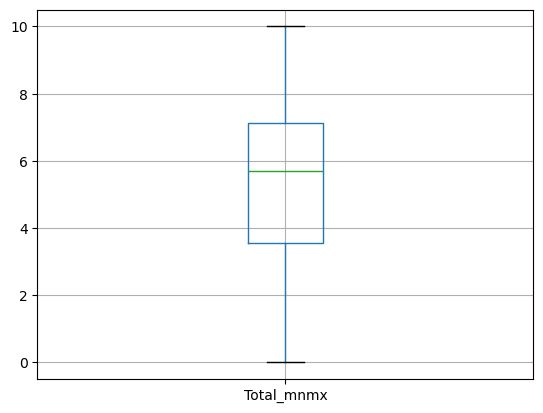

In [157]:
theMapAndData.boxplot(column=['Total_mnmx'])  


<Axes: >

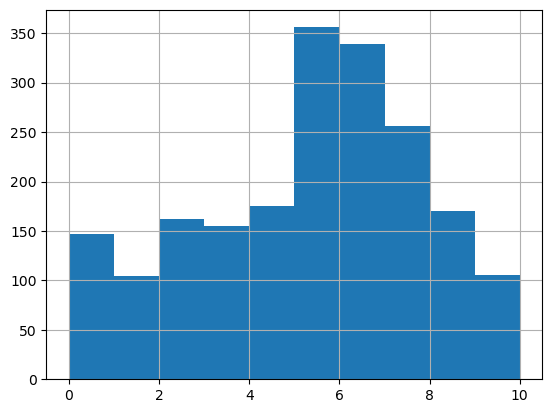

In [158]:
theMapAndData['Total_mnmx'].hist()

In [159]:
pip show numba pysal mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: c:\users\monica gonzales\anaconda3\lib\site-packages
Requires: llvmlite, numpy
Required-by: datashader
---
Name: mapclassify
Version: 2.8.0
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: c:\users\monica gonzales\anaconda3\lib\site-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 1.24.0
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: c:\users\monica gonzales\anaconda3\lib\site-packages
Requires: 
Required-by: astropy, bkcharts, bokeh, Bottleneck, contourpy, daal4py, datashader, gensim, geopandas, h5py, holoviews, hvplot, imagecodecs, imageio, mapclassify, matplotlib, mkl_fft, mkl_random, 

In [160]:
import mapclassify 
import numpy as np

np.random.seed(12345) 

K=5
theVar=theMapAndData.Total_mnmx
ei5 = mapclassify.EqualInterval(theVar, k=K)
msd = mapclassify.StdMean(theVar)
q5=mapclassify.Quantiles(theVar,k=K)

mb5 = mapclassify.MaximumBreaks(theVar, k=K)
ht = mapclassify.HeadTailBreaks(theVar) 
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K) 

In [161]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
fits = np.array([ c.adcm for c in class5])
adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

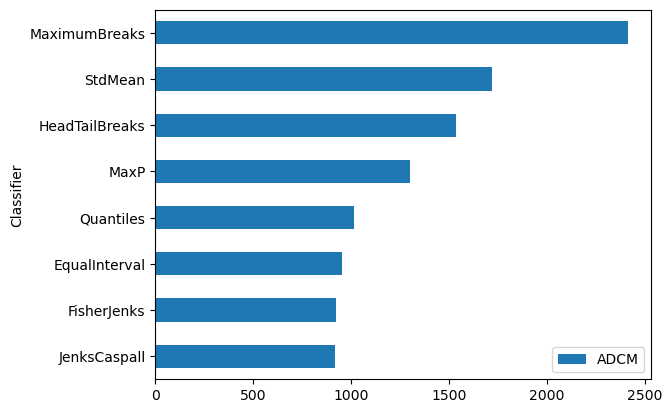

In [162]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [163]:
theMapAndData.loc[:,'Total_ei5'] = ei5.yb
theMapAndData.loc[:,'Total_fj5'] = fj5.yb
theMapAndData.loc[:,'Total_jc5'] = jc5.yb

In [164]:
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,4.400000,4.6,3.0,5.8,AG,ATG,4.171011,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,3.800000,3.7,2.7,6.1,AG,ATG,4.034908,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,4.411041,4.6,3.2,5.8,AG,ATG,3.948394,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,4.700000,4.9,3.3,6.1,AG,ATG,4.278132,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,4.500000,4.6,3.0,5.8,AG,ATG,4.142562,2,1,1


In [165]:
indexList=['Total_ei5','Total_fj5','Total_jc5']
aggregator={'Total_mnmx': ['mean']}

pd.concat([theMapAndData[['Total_mnmx',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,Total_ei5,Total_mnmx,Total_fj5,Total_mnmx,Total_jc5,Total_mnmx
,,mean,,mean,,mean
0,0,0.901965,0,0.937088,0,0.901965
1,1,3.027346,1,3.199770,1,3.193175
2,2,5.227688,2,5.433028,2,5.466820
3,3,6.906840,3,6.964059,3,6.940591
4,4,8.862077,4,8.766700,4,8.687480


In [166]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


In [167]:
newColNames=[ name+"_cat" for name in indexList]

theMapAndData[newColNames]=theMapAndData.loc[:,indexList]
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,5.8,AG,ATG,4.171011,2,1,1,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,6.1,AG,ATG,4.034908,2,1,1,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,5.8,AG,ATG,3.948394,1,1,1,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,6.1,AG,ATG,4.278132,2,1,1,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,5.8,AG,ATG,4.142562,2,1,1,2,1,1


In [168]:
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData[newColNames]=theMapAndData.loc[:,newColNames].replace(newLabelsForLevels)
theMapAndData.drop(columns=['Country'],inplace=True)
theMapAndData

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.900000,3.7,4.1,4.5,5.6,7.6,...,5.8,AG,ATG,4.171011,2,1,1,2_Middle,1_Good,1_Good
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.900000,3.7,3.6,6.6,5.1,6.2,...,6.1,AG,ATG,4.034908,2,1,1,2_Middle,1_Good,1_Good
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.700000,3.7,3.6,4.8,4.2,6.7,...,5.8,AG,ATG,3.948394,1,1,1,1_Good,1_Good,1_Good
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.900000,3.7,4.1,4.5,5.3,7.6,...,6.1,AG,ATG,4.278132,2,1,1,2_Middle,1_Good,1_Good
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2015,57.800000,5.200000,3.7,3.9,5.0,5.0,7.3,...,5.8,AG,ATG,4.142562,2,1,1,2_Middle,1_Good,1_Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",2020,82.663114,6.463114,8.3,5.6,7.2,6.5,7.3,...,8.9,TL,TLS,6.955837,3,3,3,3_Bad,3_Bad,3_Bad
1965,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",2016,90.800000,7.400000,8.3,6.7,8.1,7.0,7.3,...,9.0,TL,TLS,7.563025,3,3,3,3_Bad,3_Bad,3_Bad
1966,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",2017,90.500000,7.200000,8.3,6.5,7.9,6.8,7.6,...,9.5,TL,TLS,7.542017,3,3,3,3_Bad,3_Bad,3_Bad
1967,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",2021,80.900000,6.200000,8.3,5.3,7.7,6.2,7.0,...,8.6,TL,TLS,6.774869,3,3,3,3_Bad,3_Bad,3_Bad


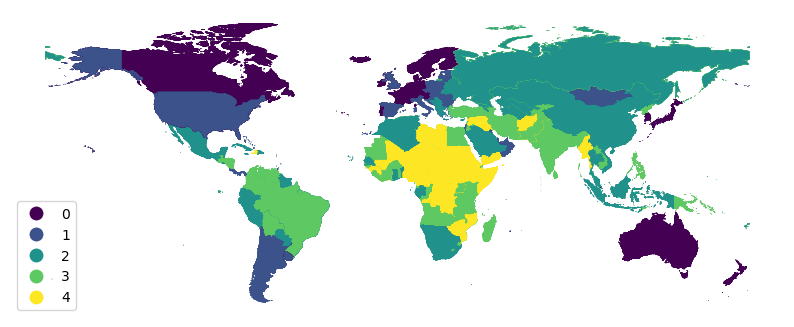

In [169]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5', 
                   cmap='viridis',
                   categorical=True, 
                   edgecolor='white',
                   linewidth=0.,
                   alpha=1, 
                   legend=True,
                   legend_kwds={'loc':"lower left"}, 
        ax=ax
       )

ax.set_axis_off()

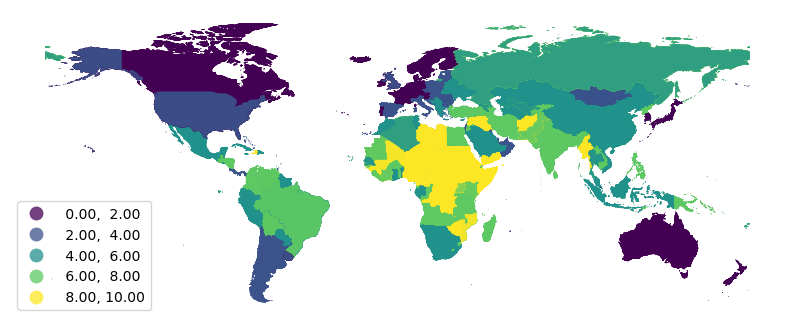

In [170]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_mnmx', 
        cmap='viridis', 
                   scheme="equal_interval",
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

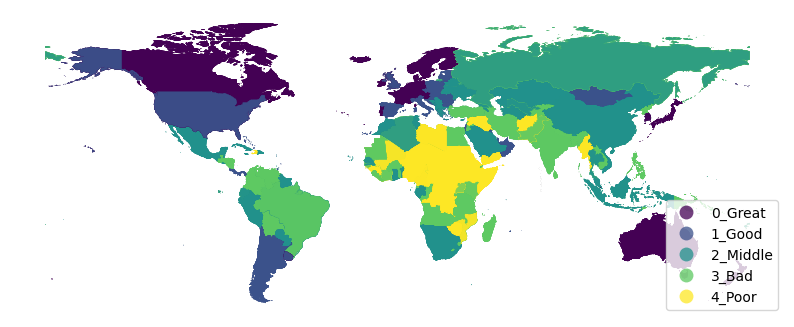

In [171]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5_cat', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':"lower right"},
        ax=ax
       )

ax.set_axis_off()

In [172]:
theMapAndData.to_file(os.path.join("data","theMapAndData.gpkg"), layer='fragility', driver="GPKG")


In [175]:
import geopandas as gpd

# Guardar la capa base de Rusia en el GPKG
rusia.to_file("rusia_data.gpkg", layer='rusia', driver="GPKG")

# Guardar las ciudades en el mismo GPKG
citiesRusia_clipped.to_file("rusia_data.gpkg", layer='cities', driver="GPKG", append=True)

# Guardar los ríos en el mismo GPKG
riversRusia_clipped.to_file("rusia_data.gpkg", layer='rivers', driver="GPKG", append=True)
